In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation du jeu de données

In [219]:
# On importe une partie du jeu de données de 2018 (10 000 indiv.)
df = pd.read_csv('valeursfoncieres-2018.txt', sep="|", decimal=",")

C:\Users\clovi\AppData\Local\Temp\ipykernel_8692\2015656583.py:2: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('valeursfoncieres-2018.txt', sep="|", decimal=",")


In [221]:
# On paramétrise notre display function pour avoir toutes les variables
pd.set_option('display.max_columns', None)
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,1,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,73,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,163.0,4.0,AG,JARD,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,51.0,2.0,AG,JARD,420.0


In [222]:
df.shape

(3335292, 43)

In [223]:
# On extrait les noms des variables
df.columns

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [224]:
# On regarde le nombre de valeurs unique dans chaque colonne pour enlever les variables qui n'apporte pas d'information
for col in df.columns:
    print(col)
    print(len(df[col].unique()))

Identifiant de document
1
Reference document
1
1 Articles CGI
1
2 Articles CGI
1
3 Articles CGI
1
4 Articles CGI
1
5 Articles CGI


1
No disposition
362
Date mutation
364
Nature mutation
6
Valeur fonciere
133048
No voie
7203
B/T/Q
42
Type de voie
138
Code voie
17044
Voie
434582
Code postal
5866
Commune
31178
Code departement
99
Code commune
907
Prefixe de section
736
Section
585
No plan
6771
No Volume
984
1er lot
12476
Surface Carrez du 1er lot
18730
2eme lot
6013
Surface Carrez du 2eme lot
12464
3eme lot
1466
Surface Carrez du 3eme lot
4940
4eme lot
797
Surface Carrez du 4eme lot
1568
5eme lot
580
Surface Carrez du 5eme lot
649
Nombre de lots
82
Code type local
5
Type local
5
Identifiant local
1
Surface reelle bati
4607
Nombre pieces principales
48
Nature culture
28
Nature culture speciale
126
Surface terrain
46319


# Nettoyage du jeu de données

In [225]:
# On enlève donc les variables avec une valeur (souvent NaN) ou d'identifiant (qui n'auront donc pas d'intérêt dans la prédiction ou l'exploration)
df.drop(columns=['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI','No disposition', 'No plan', 'Identifiant local', 'No Volume'], inplace=True)

In [226]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,03/01/2018,Vente,109000.0,13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,04/01/2018,Vente,239300.0,4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,51.0,2.0,AG,JARD,420.0


B/T/Q représente l'indice de répétition qui est est une mention qui complète une numérotation de voirie. L’indice de répétition permet de
différencier plusieurs adresses portant le même numéro dans la même rue. Elle ne nous servira pas en soit car donc pas car 

In [227]:
df.drop(columns=["B/T/Q"], inplace=True)

In [228]:
df.head(n= 10)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,51.0,2.0,AG,JARD,420.0
5,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,51.0,2.0,S,NaN,949.0
6,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,278.0
7,04/01/2018,Vente,90000.0,5050.0,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,150.0,3.0,S,NaN,347.0
8,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,23.0
9,10/01/2018,Vente,3150.0,NaN,NaN,B077,PONT D AIN,1160.0,PONT-D AIN,1,304,NaN,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,126.0


In [229]:
# On regarde le nombre de valeurs manquantes dans chaque colonne pour enlever les variables qui n'apporte pas d'information
for col in df.columns:
    print(col)
    print(df[col].isnull().sum()/df.shape[0])

Date mutation
0.0
Nature mutation
0.0
Valeur fonciere
0.009596461119446214
No voie
0.4201563161486311
Type de voie
0.4335878237947382
Code voie
0.009099952867694942
Voie
0.009105949344165368
Code postal
0.009150023446223
Commune
0.0
Code departement
0.0
Code commune
0.0
Prefixe de section
0.956509055279118
Section
2.5485024999310406e-05
1er lot
0.6886014777716614
Surface Carrez du 1er lot
0.9131650242317614
2eme lot
0.9345460607347122
Surface Carrez du 2eme lot
0.9787370940835165
3eme lot
0.9890084586297092
Surface Carrez du 3eme lot
0.9978895401062335
4eme lot
0.9961670522401037
Surface Carrez du 4eme lot
0.999438130154721
5eme lot
0.9981890641059313
Surface Carrez du 5eme lot
0.9997697353035356
Nombre de lots
0.0
Code type local
0.45048769343133976
Type local
0.45048769343133976
Surface reelle bati
0.4513373941471991
Nombre pieces principales
0.4513373941471991
Nature culture
0.3161249449823284
Nature culture speciale
0.953757572050663
Surface terrain
0.3161249449823284


Le nombre de lot est suffisant pour nous indiquer la présence ou non de lots. Le reste est redondant.

In [230]:
df.drop(columns=['1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot'], inplace=True)

In [231]:
df.head(n=10)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,AG,JARD,420.0
5,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,S,NaN,949.0
6,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,S,NaN,278.0
7,04/01/2018,Vente,90000.0,5050.0,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,1.0,Maison,150.0,3.0,S,NaN,347.0
8,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,S,NaN,23.0
9,10/01/2018,Vente,3150.0,NaN,NaN,B077,PONT D AIN,1160.0,PONT-D AIN,1,304,NaN,AM,0,NaN,NaN,NaN,NaN,S,NaN,126.0


Nous nous occupons désormais de la variable nature culture spéciale qui nous indique la présence ou non d'un extérieur

In [232]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,AG,JARD,420.0


In [233]:
df.drop(columns=["Nature culture", "Nature culture speciale"], inplace=True)

In [234]:
df.head(n=10)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,2,2.0,Appartement,73.0,4.0,NaN
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,3.0,Dépendance,0.0,0.0,NaN
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,420.0
5,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,949.0
6,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,278.0
7,04/01/2018,Vente,90000.0,5050.0,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,1.0,Maison,150.0,3.0,347.0
8,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,23.0
9,10/01/2018,Vente,3150.0,NaN,NaN,B077,PONT D AIN,1160.0,PONT-D AIN,1,304,NaN,AM,0,NaN,NaN,NaN,NaN,126.0


In [235]:
# La présence d'un terrain est clairement indiquer par la surface présente, donc si elle est de 0: il n'y a pas de terrain
df.loc[df["Surface terrain"].isnull(), "Surface terrain"] = 0

In [236]:
df.head(n=10)

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,2,2.0,Appartement,73.0,4.0,0.0
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AN,1,3.0,Dépendance,0.0,0.0,0.0
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,163.0,4.0,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,420.0
5,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,NaN,AH,0,1.0,Maison,51.0,2.0,949.0
6,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,278.0
7,04/01/2018,Vente,90000.0,5050.0,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,1.0,Maison,150.0,3.0,347.0
8,04/01/2018,Vente,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,NaN,ZR,0,NaN,NaN,NaN,NaN,23.0
9,10/01/2018,Vente,3150.0,NaN,NaN,B077,PONT D AIN,1160.0,PONT-D AIN,1,304,NaN,AM,0,NaN,NaN,NaN,NaN,126.0


In [237]:
# En s'appuyant sur la documentation, on se rend compte que le relatif aux sections n'est pas pertinent
df.drop(columns=["Prefixe de section", "Section"], inplace=True)

In [238]:
df.head()

,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,73.0,4.0,0.0
1,03/01/2018,Vente,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,1,3.0,Dépendance,0.0,0.0,0.0
2,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,949.0
3,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,420.0
4,04/01/2018,Vente,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,420.0


In [239]:
# On extrait les différentes modalités prises par Nature mutation
df["Nature mutation"].unique()

array(['Vente', "Vente en l'état futur d'achèvement", 'Echange',
       'Vente terrain à bâtir', 'Adjudication', 'Expropriation'],
      dtype=object)

In [240]:
# On observe que ce n'est pas pertinent pour notre problématique.
df.drop(columns=["Nature mutation"], inplace=True)

In [241]:
df.head()

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
0,03/01/2018,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,73.0,4.0,0.0
1,03/01/2018,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,1,3.0,Dépendance,0.0,0.0,0.0
2,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,949.0
3,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,420.0
4,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,420.0


La variable en relation avec l'adresse se sépare en plusieurs variables, nous allons donc la concaténer. Si l'adresse est nulle, c'est parce qu'il n'y a pas de n° de voie (lieux dits?), donc on remplie adresse avec "Voie".

In [242]:
df["key"]=  df["No voie"].astype(str)+df["Voie"]+df["Commune"]+df["Date mutation"]
df.head(n=10)

,Date mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key
0,03/01/2018,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,73.0,4.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
1,03/01/2018,109000.0,13.0,RUE,1660,GEN LOGEROT,1000.0,BOURG-EN-BRESSE,1,53,1,3.0,Dépendance,0.0,0.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
2,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,949.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
3,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
4,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
5,04/01/2018,239300.0,4.0,RUE,0025,DE LA BARMETTE,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,949.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
6,04/01/2018,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,NaN,NaN,NaN,NaN,278.0,nanLE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
7,04/01/2018,90000.0,5050.0,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3.0,347.0,5050.0LE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
8,04/01/2018,90000.0,NaN,NaN,B034,LE DRUILLET,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,NaN,NaN,NaN,NaN,23.0,nanLE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
9,10/01/2018,3150.0,NaN,NaN,B077,PONT D AIN,1160.0,PONT-D AIN,1,304,0,NaN,NaN,NaN,NaN,126.0,nanPONT D AINPONT-D AIN10/01/2018


In [243]:
# On enlève les références à l'adresse qui ne nous seront d'aucunes utilité
df.drop(columns=["Type de voie", "Voie", "No voie", "Code voie"], inplace=True)

In [244]:
df.head(n=10)

,Date mutation,Valeur fonciere,No voie,Code voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key
0,03/01/2018,109000.0,13.0,1660,1000.0,BOURG-EN-BRESSE,1,53,2,2.0,Appartement,73.0,4.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
1,03/01/2018,109000.0,13.0,1660,1000.0,BOURG-EN-BRESSE,1,53,1,3.0,Dépendance,0.0,0.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
2,04/01/2018,239300.0,4.0,0025,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,949.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
3,04/01/2018,239300.0,4.0,0025,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,163.0,4.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
4,04/01/2018,239300.0,4.0,0025,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
5,04/01/2018,239300.0,4.0,0025,1250.0,NIVIGNE ET SURAN,1,95,0,1.0,Maison,51.0,2.0,949.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
6,04/01/2018,90000.0,NaN,B034,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,NaN,NaN,NaN,NaN,278.0,nanLE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
7,04/01/2018,90000.0,5050.0,B034,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,1.0,Maison,150.0,3.0,347.0,5050.0LE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
8,04/01/2018,90000.0,NaN,B034,1380.0,SAINT-CYR-SUR-MENTHON,1,343,0,NaN,NaN,NaN,NaN,23.0,nanLE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
9,10/01/2018,3150.0,NaN,B077,1160.0,PONT-D AIN,1,304,0,NaN,NaN,NaN,NaN,126.0,nanPONT D AINPONT-D AIN10/01/2018


In [248]:
# On enlève également le code département qui ne nous servira pas pour récupérer les départements (nous utiliserons le code postal et le nom de la commune)
df.drop(columns=["Code departement"], inplace=True)

In [249]:
df.head()

,Date mutation,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key
0,03/01/2018,109000.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,73.0,4.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
1,03/01/2018,109000.0,1000.0,BOURG-EN-BRESSE,53,1,Dépendance,0.0,0.0,0.0,13.0GEN LOGEROTBOURG-EN-BRESSE03/01/2018
2,04/01/2018,239300.0,1250.0,NIVIGNE ET SURAN,95,0,Maison,163.0,4.0,949.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
3,04/01/2018,239300.0,1250.0,NIVIGNE ET SURAN,95,0,Maison,163.0,4.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018
4,04/01/2018,239300.0,1250.0,NIVIGNE ET SURAN,95,0,Maison,51.0,2.0,420.0,4.0DE LA BARMETTENIVIGNE ET SURAN04/01/2018


In [306]:
# Pour ne garder les ventes que de lots uniques, on enlève toutes les ventes qui se répètent plus d'une fois
df2 = df.drop_duplicates(subset='key', keep=False)

In [307]:
df2.head()

,Date mutation,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key
7,04/01/2018,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,5050.0LE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
9,10/01/2018,3150.0,1160.0,PONT-D AIN,304,0,NaN,NaN,NaN,126.0,nanPONT D AINPONT-D AIN10/01/2018
10,12/01/2018,2100.0,1250.0,JASSERON,195,0,NaN,NaN,NaN,197.0,nanSOUS LE BOIS GIROUDJASSERON12/01/2018
11,04/01/2018,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,12.0DE LA PETITE REYSSOUZEBOURG-EN-BRESSE04/01...
12,11/01/2018,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,5.0MOLIEREBOURG-EN-BRESSE11/01/2018


In [308]:
df2.shape

(1117082, 11)

In [309]:
df2.head()

,Date mutation,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key
7,04/01/2018,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,5050.0LE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018
9,10/01/2018,3150.0,1160.0,PONT-D AIN,304,0,NaN,NaN,NaN,126.0,nanPONT D AINPONT-D AIN10/01/2018
10,12/01/2018,2100.0,1250.0,JASSERON,195,0,NaN,NaN,NaN,197.0,nanSOUS LE BOIS GIROUDJASSERON12/01/2018
11,04/01/2018,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,12.0DE LA PETITE REYSSOUZEBOURG-EN-BRESSE04/01...
12,11/01/2018,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,5.0MOLIEREBOURG-EN-BRESSE11/01/2018


In [310]:
# On change le format de la date de vente en format datetime.
df2.loc[:, 'Date mutation'] = pd.to_datetime(df2['Date mutation'] , format='%d/%m/%Y')

In [312]:
import warnings
warnings.filterwarnings("ignore")

In [313]:
# On récupère le mois et l'année de la vente.
df2.loc[:, 'year'] = pd.DatetimeIndex(df2['Date mutation']).year
df2.loc[:, 'month'] = pd.DatetimeIndex(df2['Date mutation']).month

In [314]:
df2.head()

,Date mutation,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,key,year,month
7,2018-01-04 00:00:00,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,5050.0LE DRUILLETSAINT-CYR-SUR-MENTHON04/01/2018,2018,1
9,2018-01-10 00:00:00,3150.0,1160.0,PONT-D AIN,304,0,NaN,NaN,NaN,126.0,nanPONT D AINPONT-D AIN10/01/2018,2018,1
10,2018-01-12 00:00:00,2100.0,1250.0,JASSERON,195,0,NaN,NaN,NaN,197.0,nanSOUS LE BOIS GIROUDJASSERON12/01/2018,2018,1
11,2018-01-04 00:00:00,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,12.0DE LA PETITE REYSSOUZEBOURG-EN-BRESSE04/01...,2018,1
12,2018-01-11 00:00:00,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,5.0MOLIEREBOURG-EN-BRESSE11/01/2018,2018,1


In [315]:
# On enlève la clé qui nous a servi à enlever les duplicatas et la date entière qui ne nous sert plus
df2.drop(columns=["Date mutation", "key"], inplace=True)

In [317]:
df2.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month
7,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1
9,3150.0,1160.0,PONT-D AIN,304,0,NaN,NaN,NaN,126.0,2018,1
10,2100.0,1250.0,JASSERON,195,0,NaN,NaN,NaN,197.0,2018,1
11,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,2018,1
12,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,2018,1


In [318]:
# On change les NaN values du type local en "Autres"
df2.loc[df2["Type local"].isnull(), "Type local"] = "Autres"

In [319]:
# Si NaN values dans ces variables de surfaces ou nombre de pièces principales, 0 assigné
df2.loc[df2["Surface reelle bati"].isnull(), "Surface reelle bati"] = 0
df2.loc[df2["Surface terrain"].isnull(), "Surface terrain"] = 0
df2.loc[df2["Nombre pieces principales"].isnull(), "Nombre pieces principales"] = 0

In [320]:
df2.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month
7,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1
9,3150.0,1160.0,PONT-D AIN,304,0,Autres,0.0,0.0,126.0,2018,1
10,2100.0,1250.0,JASSERON,195,0,Autres,0.0,0.0,197.0,2018,1
11,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,2018,1
12,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,2018,1


In [263]:
df2.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month
7,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1
9,3150.0,1160.0,PONT-D AIN,304,0,Autres,0.0,0.0,126.0,2018,1
10,2100.0,1250.0,JASSERON,195,0,Autres,0.0,0.0,197.0,2018,1
11,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,2018,1
12,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,2018,1


In [323]:
for col in df2.columns:
    print(col)
    print(df2[col].isnull().sum())

Valeur fonciere
4609
Code postal
59
Commune
0
Code commune
0
Nombre de lots
0
Type local
0
Surface reelle bati
0
Nombre pieces principales
0
Surface terrain
0
year
0
month
0


In [324]:
# On enlève les lignes avec des valeurs nulles
df2 = df2.dropna()

In [325]:
for col in df2.columns:
    print(col)
    print(df2[col].isnull().sum())

Valeur fonciere
0
Code postal
0
Commune
0
Code commune
0
Nombre de lots
0
Type local
0
Surface reelle bati
0
Nombre pieces principales
0
Surface terrain
0
year
0
month
0


Certains biens sont à l'euro symbolique ou ont un prix inférieur à 100€, nous enlevons ces biens

([<matplotlib.patches.Wedge at 0x1c4ca827430>,
 [Text(-1.0995462396808333, 0.03159219529788266, ''),
  Text(1.0995462369078215, -0.031592291810647294, '')],
 [Text(-0.5997524943713636, 0.01723210652611781, '99%'),
  Text(0.5997524928588116, -0.017232159169443977, '1%')])

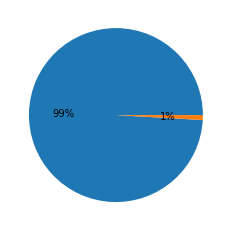

In [327]:
# On visualise le pourcentage de biens avec un prix de vente inférieur à 100€.
euro_symbol = (df2["Valeur fonciere"] < 100).value_counts()

plt.pie(euro_symbol, autopct='%.0f%%')

In [333]:
# On ne garde que les biens ayant eu un prix de vente supérieur à 100€.
df3 = df2[df2["Valeur fonciere"] > 100]
df3.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month
7,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1
9,3150.0,1160.0,PONT-D AIN,304,0,Autres,0.0,0.0,126.0,2018,1
10,2100.0,1250.0,JASSERON,195,0,Autres,0.0,0.0,197.0,2018,1
11,67000.0,1000.0,BOURG-EN-BRESSE,53,1,Appartement,45.0,1.0,0.0,2018,1
12,76200.0,1000.0,BOURG-EN-BRESSE,53,2,Appartement,68.0,3.0,0.0,2018,1


In [334]:
# On récupère les différents quartiles pour pouvoir enlever les biens avec un prix anormalement hauts comparés aux autres biens.
Q1, Q2, Q3 = df3['Valeur fonciere'].quantile([0.25, 0.5, 0.75])

# On calcule le rang interquartile
IQR = Q3-Q1

([<matplotlib.patches.Wedge at 0x1c4e076fdc0>,
 [Text(-1.0826367523345324, 0.19467321976722082, ''),
  Text(1.0826367523345324, -0.19467321976722046, '')],
 [Text(-0.5905291376370176, 0.10618539260030226, '94%'),
  Text(0.5905291376370176, -0.10618539260030206, '6%')])

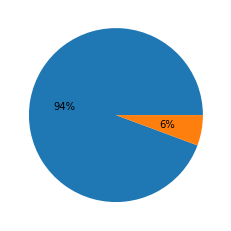

In [335]:
# On détexte les biens ayant un prix supérieur au troisième quartile multiplié par 1.5 fois le rang interquartile
outliers_max = df3["Valeur fonciere"] > (Q3 + 1.5*(IQR))
plt.pie(outliers_max.value_counts(), autopct='%.0f%%')

In [336]:
df3.shape

(1100750, 11)

In [337]:
# On ne garde que les biens n'ayant pas un prix de vente anormalement haut.
df3 = df3[df3["Valeur fonciere"] < (Q3 + 1.5*(IQR))]

# Liaison avec données des départements et communes

In [274]:
# On récupère la base de données des communes/département
departement = pd.read_csv("communes-departement-region.csv")
departement.head()

,code_commune_INSEE,nom_commune_postal,code_postal,libelle_acheminement,ligne_5,latitude,longitude,code_commune,article,nom_commune,nom_commune_complet,code_departement,nom_departement,code_region,nom_region
0,1001,L ABERGEMENT CLEMENCIAT,1400,L ABERGEMENT CLEMENCIAT,NaN,46.153426,4.926114,1.0,L',Abergement-Clémenciat,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes
1,1002,L ABERGEMENT DE VAREY,1640,L ABERGEMENT DE VAREY,NaN,46.009188,5.428017,2.0,L',Abergement-de-Varey,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes
2,1004,AMBERIEU EN BUGEY,1500,AMBERIEU EN BUGEY,NaN,45.960848,5.372926,4.0,NaN,Ambérieu-en-Bugey,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes
3,1005,AMBERIEUX EN DOMBES,1330,AMBERIEUX EN DOMBES,NaN,45.996180,4.912273,5.0,NaN,Ambérieux-en-Dombes,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes
4,1006,AMBLEON,1300,AMBLEON,NaN,45.749499,5.594320,6.0,NaN,Ambléon,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes


In [275]:
# On ne garde que les variables qui nous serviront à cartographier nos données
departement  = departement.loc[:,["code_postal", "nom_commune", "nom_departement","nom_region", "latitude", "longitude"]]
# On met en majuscule le nom des communes pour joindre les bases de données
departement["nom_commune"] = departement["nom_commune"].str.upper()
departement.head()

,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude
0,1400,ABERGEMENT-CLÉMENCIAT,Ain,Auvergne-Rhône-Alpes,46.153426,4.926114
1,1640,ABERGEMENT-DE-VAREY,Ain,Auvergne-Rhône-Alpes,46.009188,5.428017
2,1500,AMBÉRIEU-EN-BUGEY,Ain,Auvergne-Rhône-Alpes,45.960848,5.372926
3,1330,AMBÉRIEUX-EN-DOMBES,Ain,Auvergne-Rhône-Alpes,45.996180,4.912273
4,1300,AMBLÉON,Ain,Auvergne-Rhône-Alpes,45.749499,5.594320


In [338]:
df3.shape

(1038413, 11)

In [339]:
# On fait une jointure interne entre les deux bases de données
df4  = pd.merge(df3, departement, left_on=['Commune', 'Code postal'], right_on=['nom_commune', 'code_postal'], how='inner')
df4.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude
0,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
1,7300.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,344.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
2,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,210.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
3,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,798.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571
4,69000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,979.0,2018,2,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571


In [340]:
df4.shape

(791870, 17)

In [283]:
# On change le type de pièces principales pour la visualisation
df4["Nombre pieces principales"] = df4["Nombre pieces principales"].astype(int)

In [289]:
# On raccourcit le nom de ce type de local pour la visualisation
df4.loc[df4["Type local"] == 'Local industriel. commercial ou assimilé', "Type local"] = "Local"

<Axes: xlabel='Surface terrain', ylabel='Valeur fonciere'>

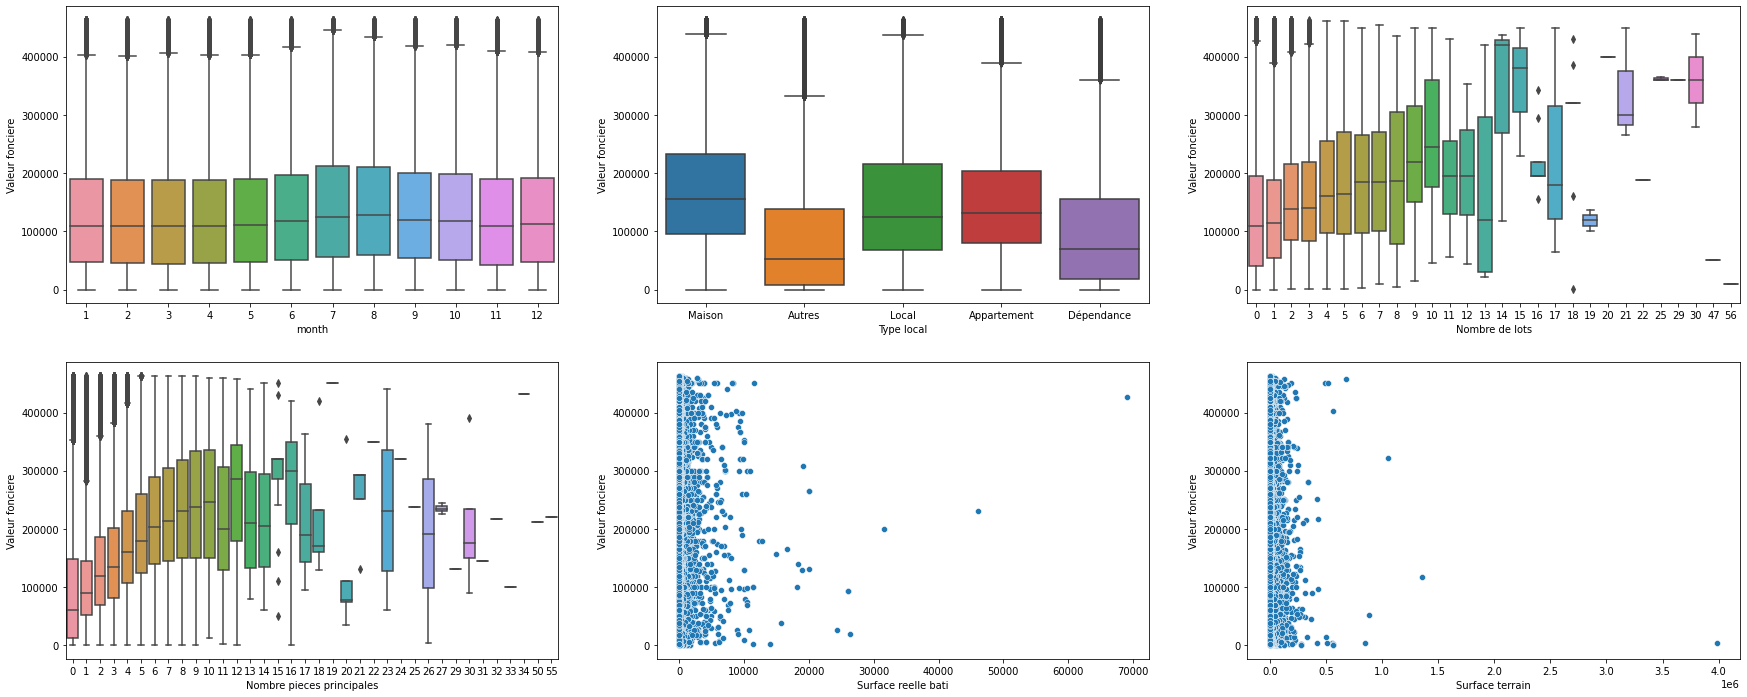

In [290]:
fig, axes = plt.subplots(2, 3,figsize=(30,12))

#create boxplot in each subplot
sns.boxplot(data=df4, x="month", y="Valeur fonciere", ax=axes[0,0])
sns.boxplot(data=df4, x="Type local", y="Valeur fonciere", ax=axes[0,1])
sns.boxplot(data=df4, x="Nombre de lots", y="Valeur fonciere", ax=axes[0,2])
sns.boxplot(data=df4, x="Nombre pieces principales", y="Valeur fonciere", ax=axes[1,0])
sns.scatterplot(data=df4, x="Surface reelle bati", y="Valeur fonciere", ax=axes[1,1])
sns.scatterplot(data=df4, x="Surface terrain", y="Valeur fonciere", ax=axes[1,2])



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
 [Text(0, 0, 'Ain'),
  Text(1, 0, 'Aisne'),
  Text(2, 0, 'Allier'),
  Text(3, 0, 'Alpes-de-Haute-Provence'),
  Text(4, 0, 'Hautes-Alpes'),
  Text(5, 0, 'Alpes-Maritimes'),
  Text(6, 0, 'Ardèche'),
  Text(7, 0, 'Ardennes'),
  Text(8, 0, 'Ariège'),
  Text(9, 0, 'Aube'),
  Text(10, 0, 'Aude'),
  Text(11, 0, 'Aveyron'),
  Text(12, 0, 'Bouches-du-Rhône'),
  Text(13, 0, 'Calvados'),
  Text(14, 0, 'Cantal'),
  Text(15, 0, 'Charente'),
  Text(16, 0, 'Charente-Maritime'),
  Text(17, 0, 'Cher'),
  Text(18, 0, 'Corrèze'),
  Text(19, 0, "Côte-d'Or"),
  Text(20, 0, "Cô

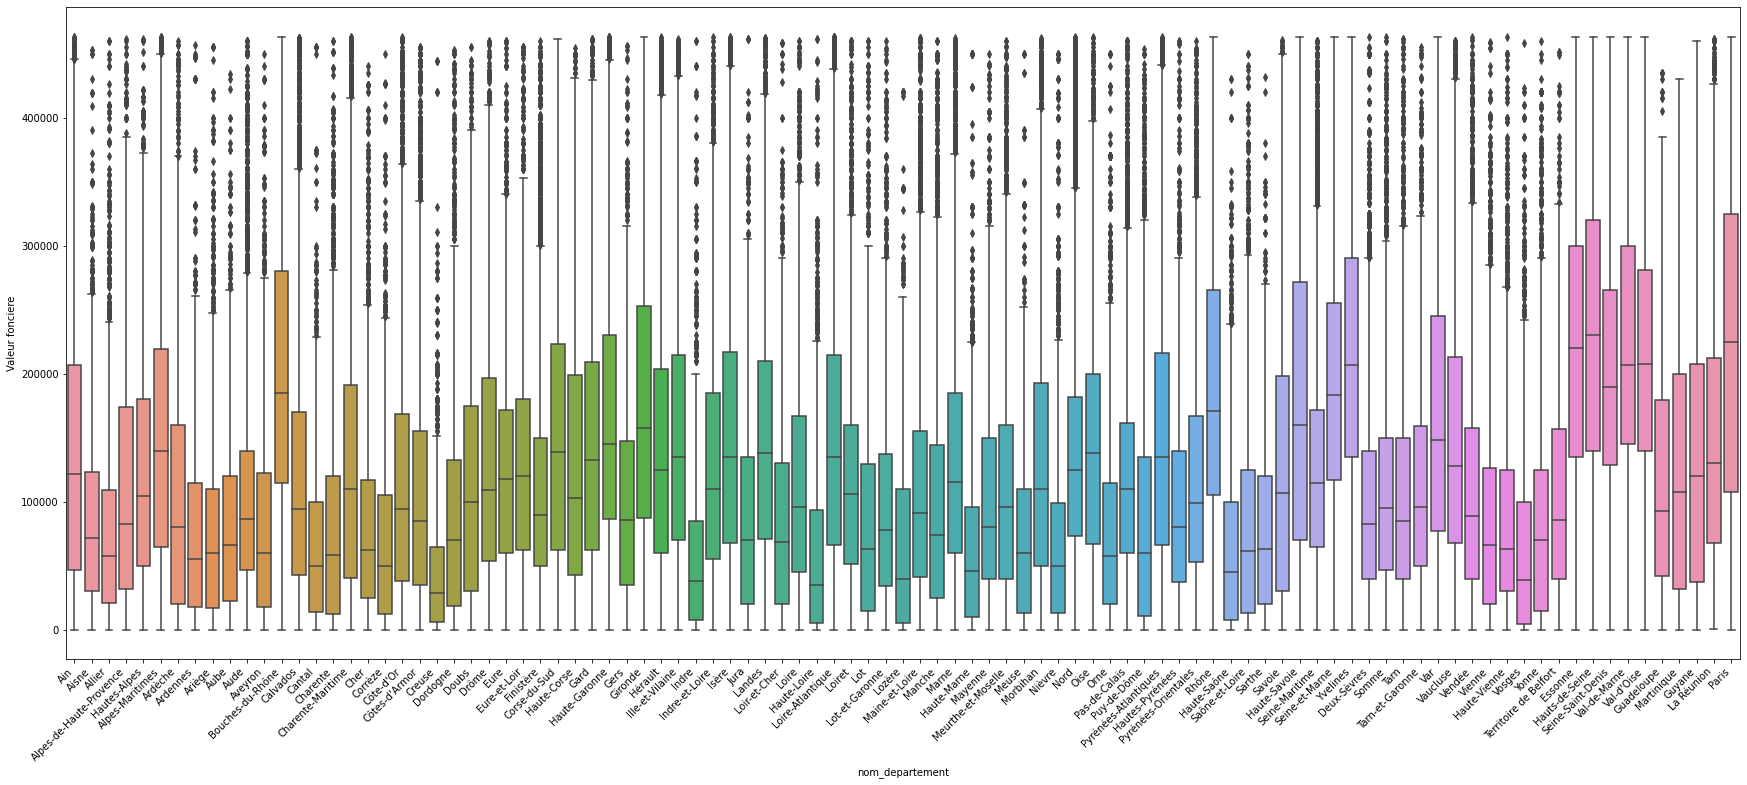

In [298]:
fig = plt.subplots(1, 1,figsize=(30,12))
sns.boxplot(data=df4, x="nom_departement", y="Valeur fonciere")
plt.xticks(rotation=45, ha='right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Auvergne-Rhône-Alpes'),
  Text(1, 0, 'Hauts-de-France'),
  Text(2, 0, "Provence-Alpes-Côte d'Azur"),
  Text(3, 0, 'Grand Est'),
  Text(4, 0, 'Occitanie'),
  Text(5, 0, 'Normandie'),
  Text(6, 0, 'Nouvelle-Aquitaine'),
  Text(7, 0, 'Centre-Val de Loire'),
  Text(8, 0, 'Bourgogne-Franche-Comté'),
  Text(9, 0, 'Bretagne'),
  Text(10, 0, 'Corse'),
  Text(11, 0, 'Pays de la Loire'),
  Text(12, 0, 'Île-de-France'),
  Text(13, 0, 'Guadeloupe'),
  Text(14, 0, 'Martinique'),
  Text(15, 0, 'Guyane'),
  Text(16, 0, 'La Réunion')])

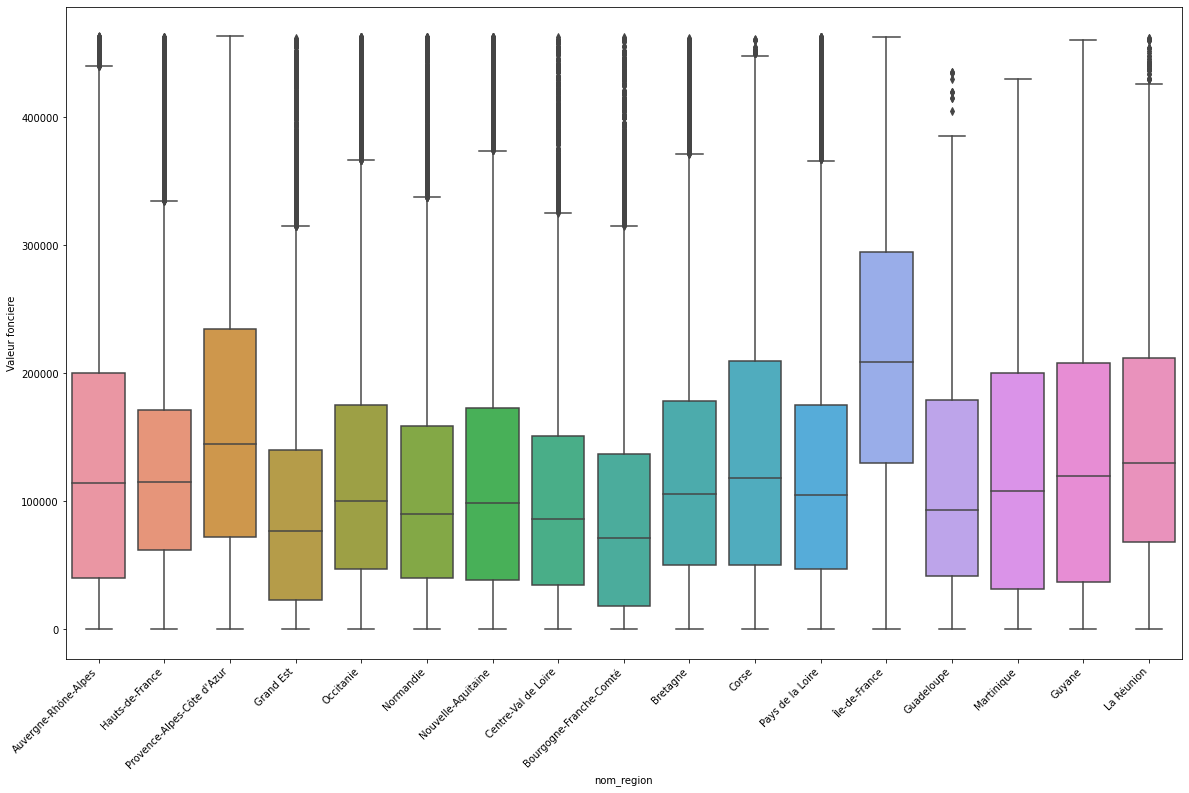

In [301]:
fig = plt.subplots(1, 1,figsize=(20,12))
sns.boxplot(data=df4, x="nom_region", y="Valeur fonciere")
plt.xticks(rotation=45, ha='right')

# Variables supplémentaires

### Population active par département: https://www.insee.fr/fr/statistiques/2012710#titre-bloc-1

In [346]:
pop = pd.read_excel("pop_active.xlsx")
pop.head()

,code_departement,nom_departement,pop_active
0,01,Ain,320682.0
1,02,Aisne,233225.0
2,03,Allier,140547.0
3,04,Alpes-de-Haute-Provence,71118.0
4,05,Hautes-Alpes,63358.0


In [352]:
df4.shape

(791870, 17)

In [349]:
# On fait une jointure interne entre les deux bases de données
df5  = pd.merge(df4, pop, on="nom_departement", how='inner')
df5.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude,code_departement,pop_active
0,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0
1,7300.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,344.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0
2,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,210.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0
3,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,798.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0
4,69000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,979.0,2018,2,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0


### Salaire Net Horaire Moyen par département (2021)- https://www.insee.fr/fr/statistiques/2021266

In [354]:
salaire = pd.read_excel("base-cc-bases-tous-salaries-2021.xlsx")
salaire.head()

,nom_departement,salaire_moyen
0,Ain,15.336249
1,Aisne,13.922082
2,Allier,13.625538
3,Alpes-de-Haute-Provence,14.153700
4,Hautes-Alpes,13.540125


In [355]:
# On fait une jointure interne entre les deux bases de données
df5  = pd.merge(df5, salaire, on="nom_departement", how='inner')
df5.head()

,Valeur fonciere,Code postal,Commune,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,year,month,code_postal,nom_commune,nom_departement,nom_region,latitude,longitude,code_departement,pop_active,salaire_moyen
0,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Maison,150.0,3.0,347.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0,15.336249
1,7300.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,344.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0,15.336249
2,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,210.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0,15.336249
3,60000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,798.0,2018,1,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0,15.336249
4,69000.0,1380.0,SAINT-CYR-SUR-MENTHON,343,0,Autres,0.0,0.0,979.0,2018,2,1380,SAINT-CYR-SUR-MENTHON,Ain,Auvergne-Rhône-Alpes,46.275401,4.967571,01,320682.0,15.336249


In [357]:
matrix = df5.loc[:,['Valeur fonciere', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', "pop_active", "salaire_moyen"]].corr()
matrix

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain,pop_active,salaire_moyen
Valeur fonciere,1.000000,0.091011,0.124803,0.384362,-0.066907,0.297361,0.304482
Nombre de lots,0.091011,1.000000,-0.001365,0.017068,-0.091130,0.230276,0.338557
Surface reelle bati,0.124803,-0.001365,1.000000,0.191465,-0.013715,-0.002488,-0.022253
Nombre pieces principales,0.384362,0.017068,0.191465,1.000000,-0.104162,0.060600,-0.022547
Surface terrain,-0.066907,-0.091130,-0.013715,-0.104162,1.000000,-0.073674,-0.061876
pop_active,0.297361,0.230276,-0.002488,0.060600,-0.073674,1.000000,0.649197
salaire_moyen,0.304482,0.338557,-0.022253,-0.022547,-0.061876,0.649197,1.000000
